              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3072
           1       0.99      0.93      0.96       945

    accuracy                           0.98      4017
   macro avg       0.98      0.97      0.97      4017
weighted avg       0.98      0.98      0.98      4017

ROC AUC: 0.9654054026124339


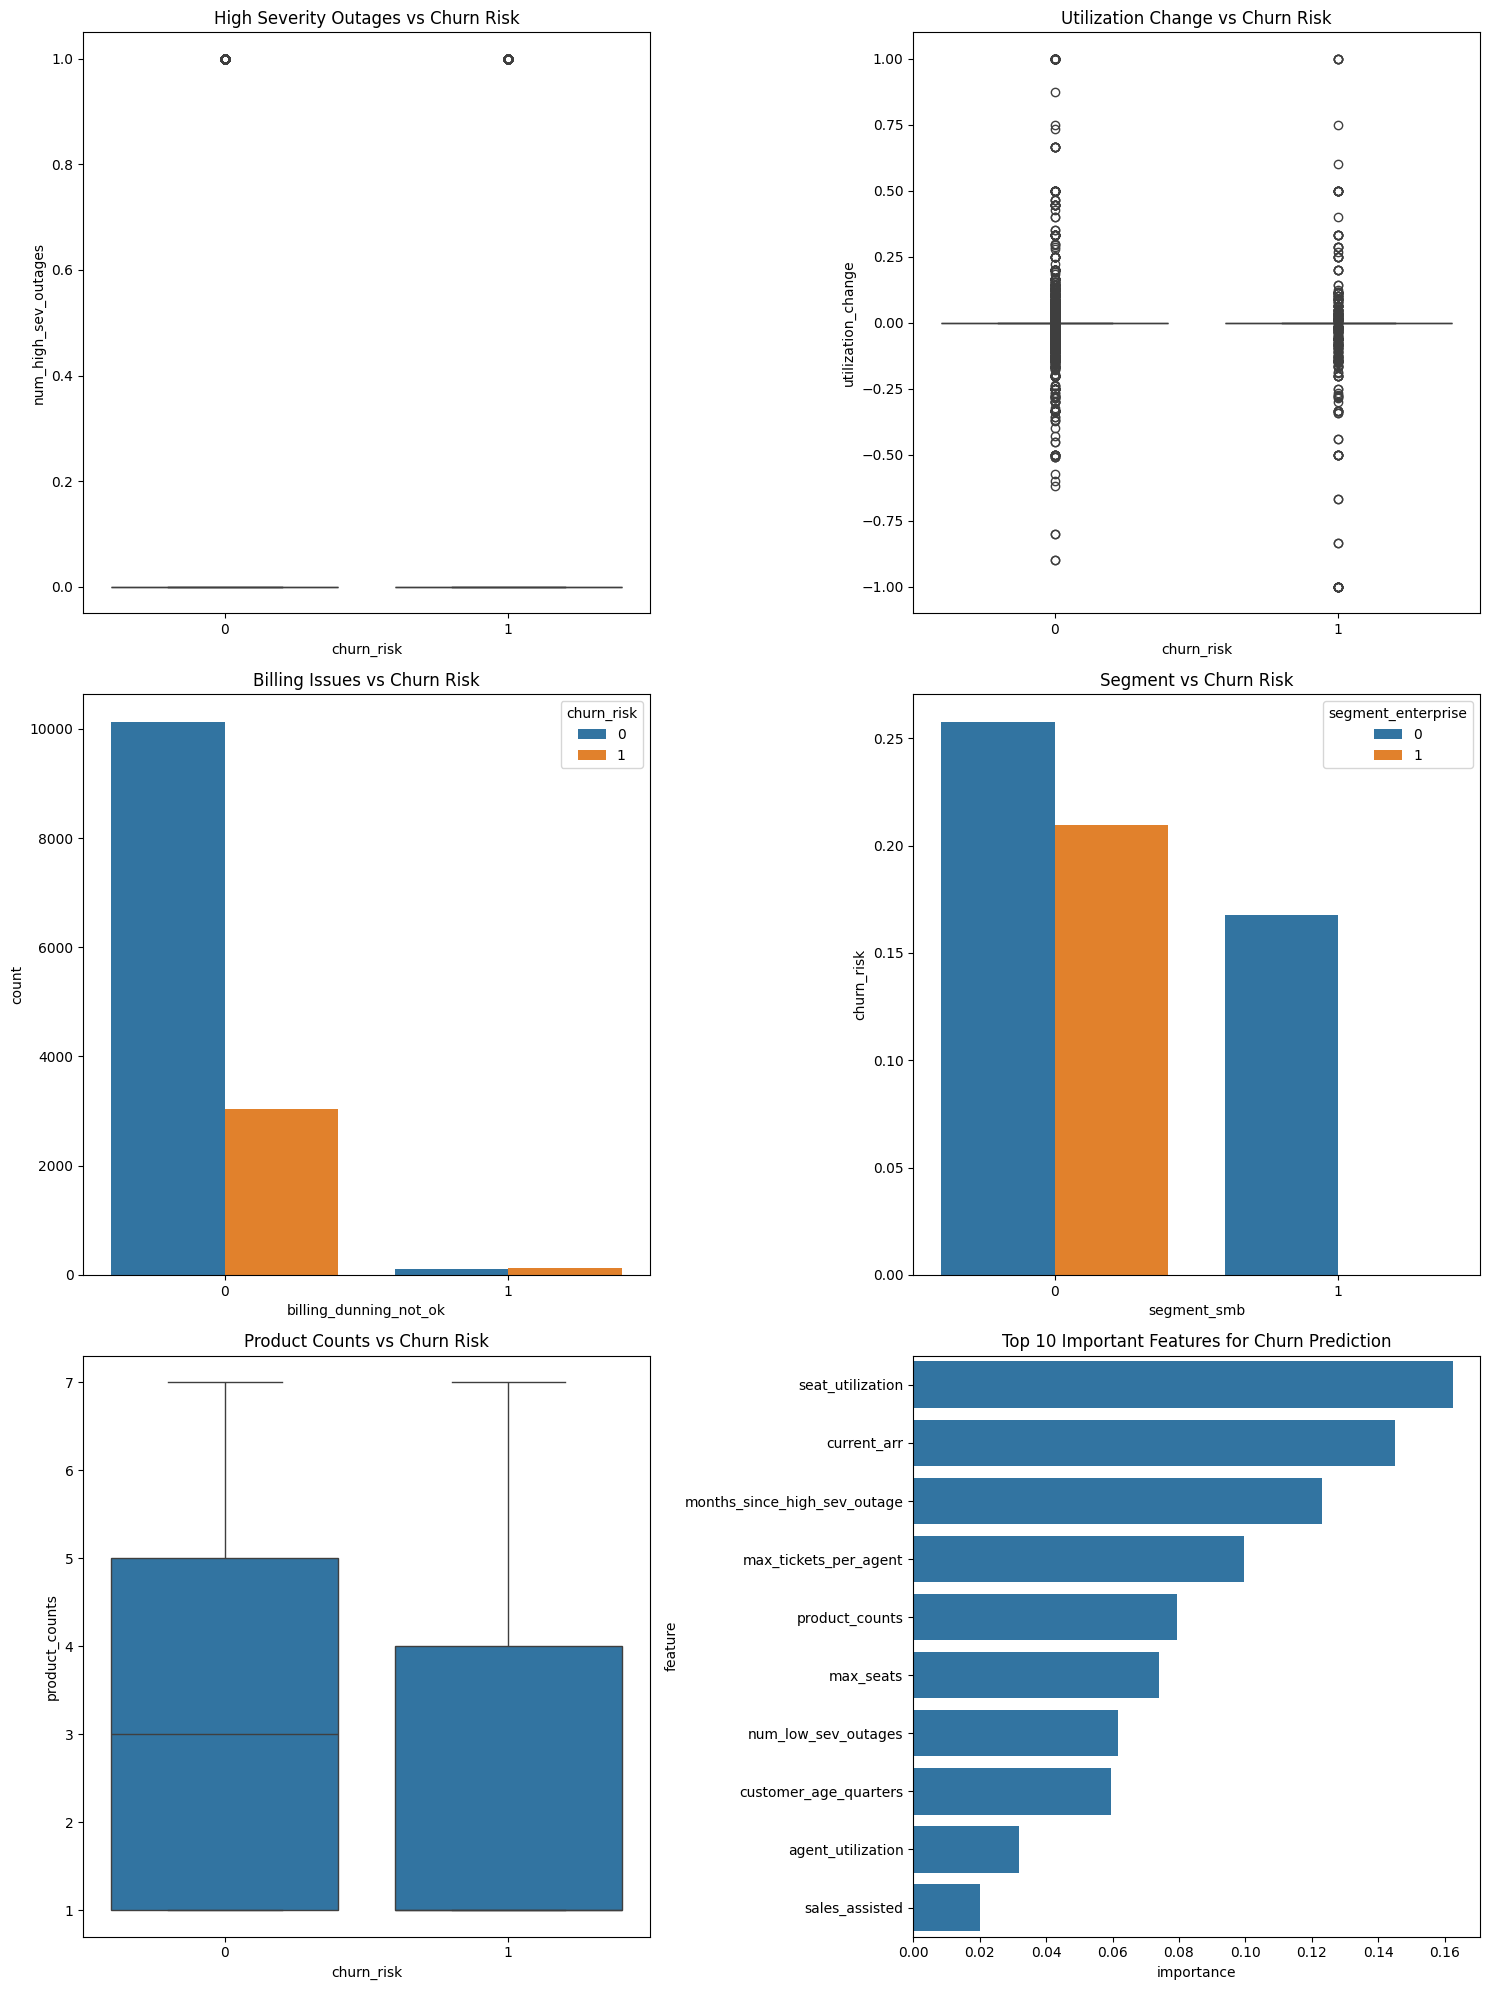

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('merged_data.csv')


df['churn_risk'] = (df['arr_change'] < 0).astype(int) | (df["seat_utilization"]==0).astype(int)
df['churn_risk'].value_counts()


df['outage_severity_ratio'] = df['num_high_sev_outages'] / (df['num_low_sev_outages'] + 1)
df['utilization_change'] = df['seat_utilization'] - df['seat_utilization_M_before']
df['tenure_group'] = pd.cut(df['customer_age_quarters'], 
                           bins=[0, 4, 8, 12, 16, 20, np.inf],
                           labels=['0-1y', '1-2y', '2-3y', '3-4y', '4-5y', '5y+'])


features = [
    'segment_smb', 'segment_non_smb', 'segment_commercial', 'segment_enterprise', 'segment_midmarket',
    'region_emea', 'region_apac', 'region_latam', 'region_amer',
    'customer_age_quarters', 'sales_assisted', 'legacy_flag', 'product_counts',
    'billing_dunning_not_ok', 'num_low_sev_outages', 'num_high_sev_outages',
    'months_since_high_sev_outage', 'num_tickets_deflected', 'max_tickets_per_agent',
    'current_arr', 'discount_arr_usd', 'discount_arr_usd_percentage',
    'product_counts_percentage', 'max_seats', 'agent_utilization',
    'seat_utilization', 'outage_severity_ratio', 'utilization_change'
]


target = 'churn_risk'


X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = RandomForestClassifier(random_state=42,class_weight='balanced')
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))


feature_importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)


plt.figure(figsize=(15, 20))


plt.subplot(3, 2, 1)
sns.boxplot(x='churn_risk', y='num_high_sev_outages', data=df)
plt.title('High Severity Outages vs Churn Risk')


plt.subplot(3, 2, 2)
sns.boxplot(x='churn_risk', y='utilization_change', data=df)
plt.title('Utilization Change vs Churn Risk')


plt.subplot(3, 2, 3)
sns.countplot(x='billing_dunning_not_ok', hue='churn_risk', data=df)
plt.title('Billing Issues vs Churn Risk')


segment_churn = df.groupby(['segment_smb', 'segment_enterprise'])['churn_risk'].mean().reset_index()
plt.subplot(3, 2, 4)
sns.barplot(x='segment_smb', y='churn_risk', hue='segment_enterprise', data=segment_churn)
plt.title('Segment vs Churn Risk')


plt.subplot(3, 2, 5)
sns.boxplot(x='churn_risk', y='product_counts', data=df)
plt.title('Product Counts vs Churn Risk')


plt.subplot(3, 2, 6)
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Important Features for Churn Prediction')

plt.tight_layout()
plt.show()

Random Forest Results:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3072
           1       0.99      0.93      0.96       945

    accuracy                           0.98      4017
   macro avg       0.98      0.97      0.97      4017
weighted avg       0.98      0.98      0.98      4017

Random Forest ROC AUC: 0.9654054026124339

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      3072
           1       0.65      0.60      0.63       945

    accuracy                           0.83      4017
   macro avg       0.76      0.75      0.76      4017
weighted avg       0.83      0.83      0.83      4017

Logistic Regression ROC AUC: 0.7514979125330689

SVM Results:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3072
           1       0.82      0.70      0.76       945

    accuracy             

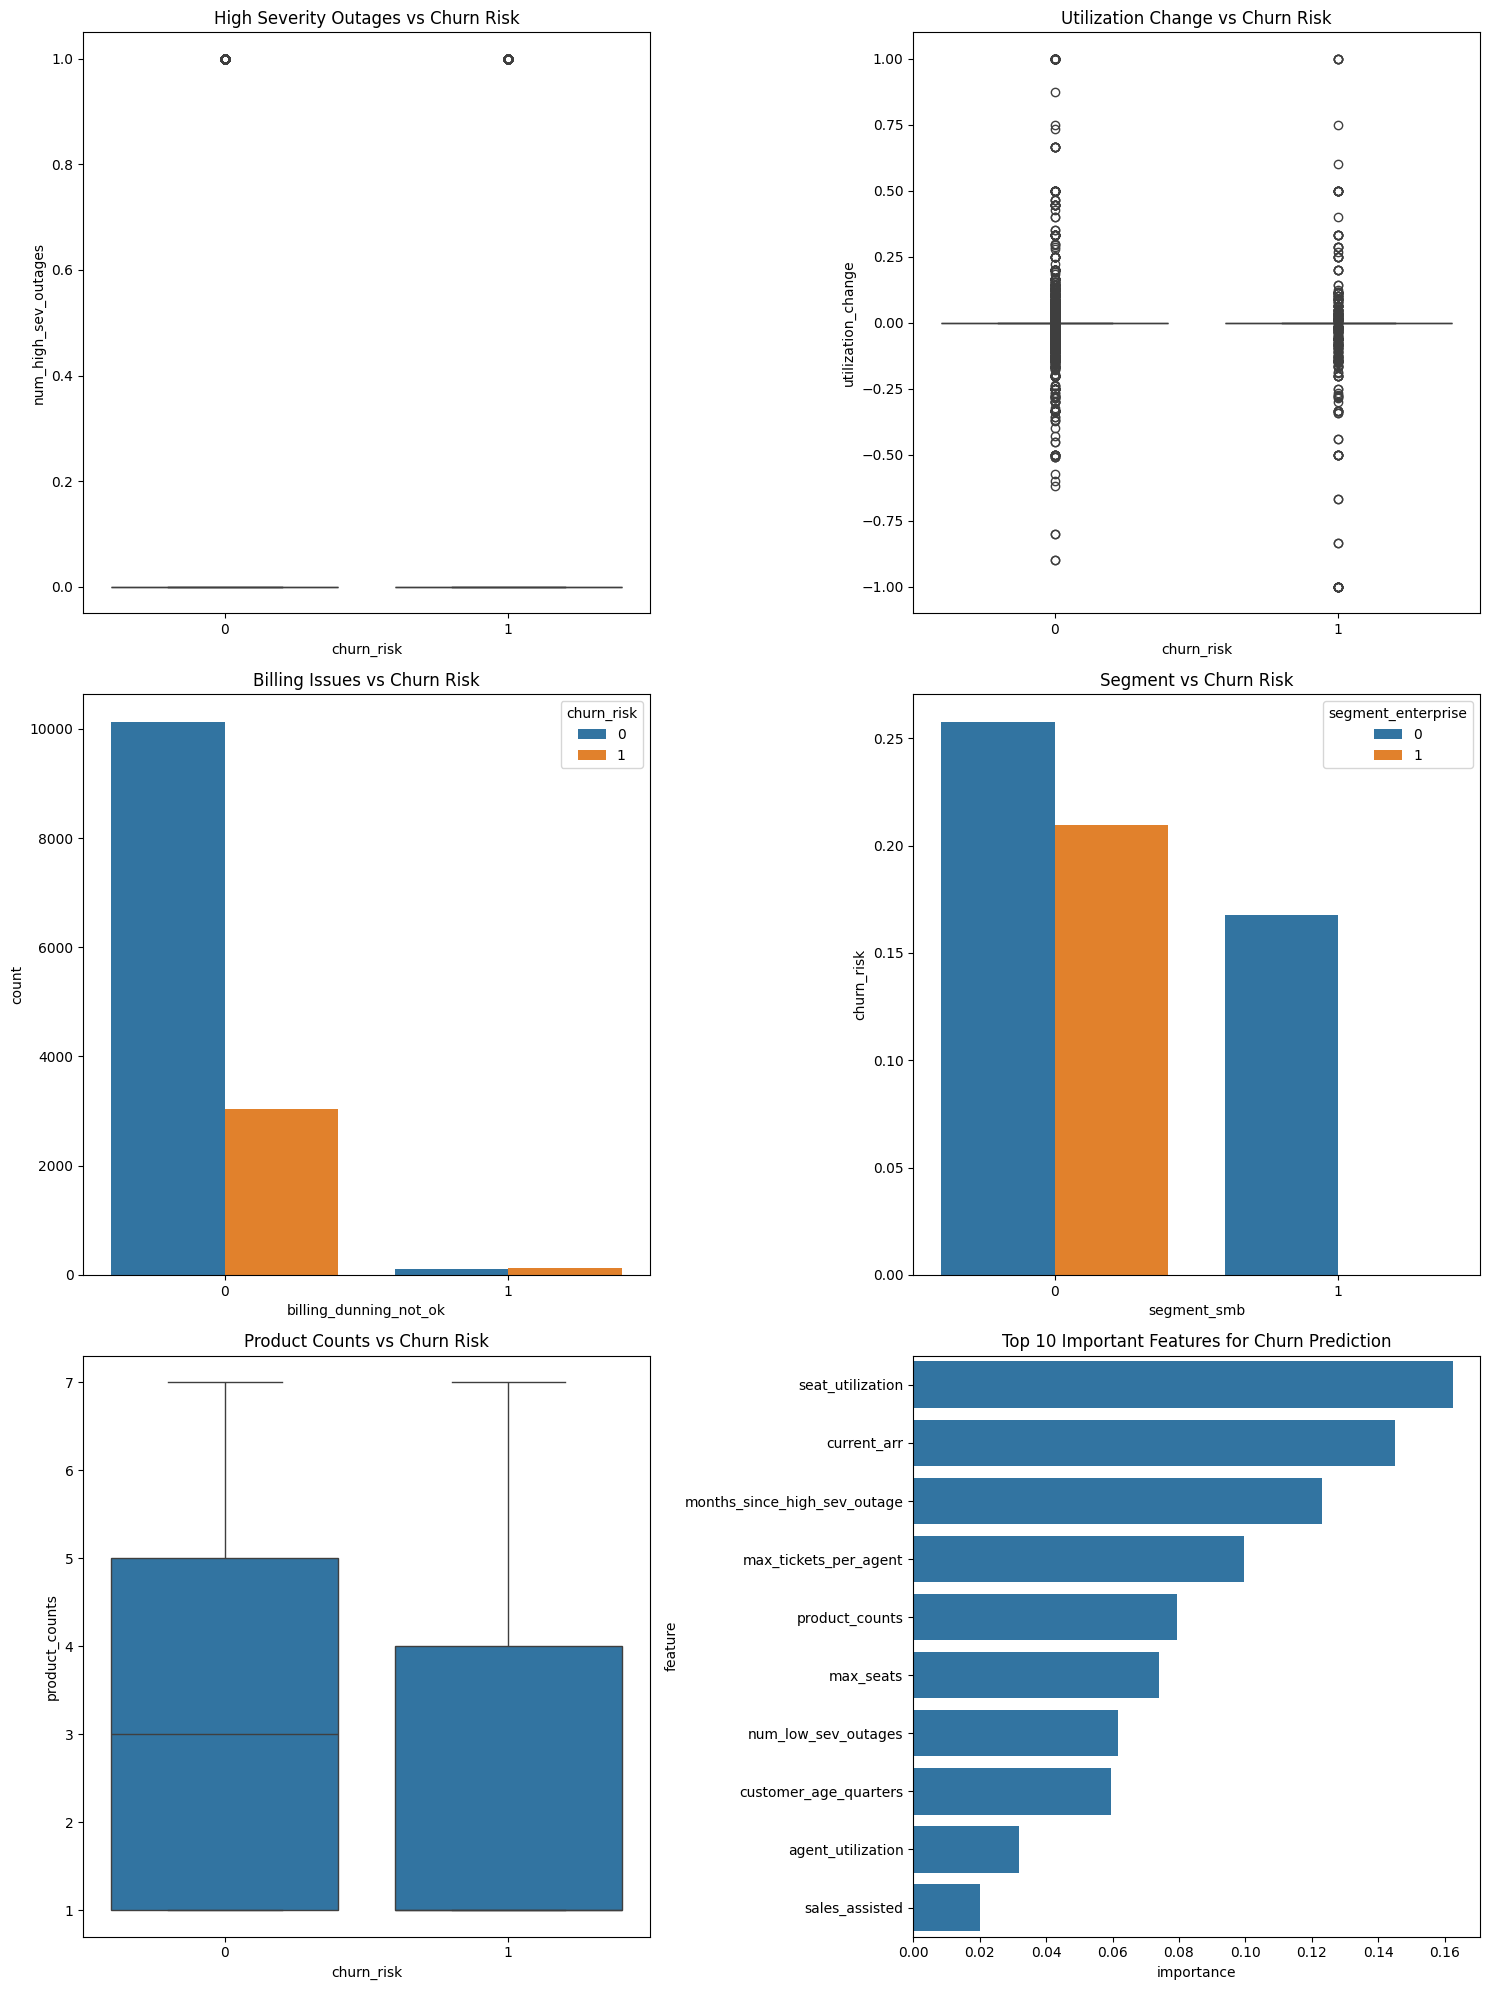


Model Comparison:
Random Forest ROC AUC: 0.9654054026124339
Logistic Regression ROC AUC: 0.7514979125330689
SVM ROC AUC: 0.8275597304894179


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('merged_data.csv')

# Feature engineering
df['churn_risk'] = (df['arr_change'] < 0).astype(int) | (df["seat_utilization"] == 0).astype(int)
df['outage_severity_ratio'] = df['num_high_sev_outages'] / (df['num_low_sev_outages'] + 1)
df['utilization_change'] = df['seat_utilization'] - df['seat_utilization_M_before']
df['tenure_group'] = pd.cut(df['customer_age_quarters'], 
                            bins=[0, 4, 8, 12, 16, 20, np.inf],
                            labels=['0-1y', '1-2y', '2-3y', '3-4y', '4-5y', '5y+'])

# Define features and target
features = [
    'segment_smb', 'segment_non_smb', 'segment_commercial', 'segment_enterprise', 'segment_midmarket',
    'region_emea', 'region_apac', 'region_latam', 'region_amer',
    'customer_age_quarters', 'sales_assisted', 'legacy_flag', 'product_counts',
    'billing_dunning_not_ok', 'num_low_sev_outages', 'num_high_sev_outages',
    'months_since_high_sev_outage', 'num_tickets_deflected', 'max_tickets_per_agent',
    'current_arr', 'discount_arr_usd', 'discount_arr_usd_percentage',
    'product_counts_percentage', 'max_seats', 'agent_utilization',
    'seat_utilization', 'outage_severity_ratio', 'utilization_change'
]
target = 'churn_risk'

X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest ROC AUC:", roc_auc_score(y_test, y_pred_rf))

# Logistic Regression model
logistic_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)
print("\nLogistic Regression Results:")
print(classification_report(y_test, y_pred_logistic))
print("Logistic Regression ROC AUC:", roc_auc_score(y_test, y_pred_logistic))

# SVM model
svm_model = SVC(random_state=42, class_weight='balanced', probability=True)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
print("\nSVM Results:")
print(classification_report(y_test, y_pred_svm))
print("SVM ROC AUC:", roc_auc_score(y_test, y_pred_svm))

# Feature importance for Random Forest
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Visualization
plt.figure(figsize=(15, 20))

plt.subplot(3, 2, 1)
sns.boxplot(x='churn_risk', y='num_high_sev_outages', data=df)
plt.title('High Severity Outages vs Churn Risk')

plt.subplot(3, 2, 2)
sns.boxplot(x='churn_risk', y='utilization_change', data=df)
plt.title('Utilization Change vs Churn Risk')

plt.subplot(3, 2, 3)
sns.countplot(x='billing_dunning_not_ok', hue='churn_risk', data=df)
plt.title('Billing Issues vs Churn Risk')

segment_churn = df.groupby(['segment_smb', 'segment_enterprise'])['churn_risk'].mean().reset_index()
plt.subplot(3, 2, 4)
sns.barplot(x='segment_smb', y='churn_risk', hue='segment_enterprise', data=segment_churn)
plt.title('Segment vs Churn Risk')

plt.subplot(3, 2, 5)
sns.boxplot(x='churn_risk', y='product_counts', data=df)
plt.title('Product Counts vs Churn Risk')

plt.subplot(3, 2, 6)
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Important Features for Churn Prediction')

plt.tight_layout()
plt.show()

# Model comparison
print("\nModel Comparison:")
print(f"Random Forest ROC AUC: {roc_auc_score(y_test, y_pred_rf)}")
print(f"Logistic Regression ROC AUC: {roc_auc_score(y_test, y_pred_logistic)}")
print(f"SVM ROC AUC: {roc_auc_score(y_test, y_pred_svm)}")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv('merged_data.csv')

# Feature engineering
df['churn_risk'] = (df['arr_change'] < 0).astype(int) | (df["seat_utilization"] == 0).astype(int)
df['outage_severity_ratio'] = df['num_high_sev_outages'] / (df['num_low_sev_outages'] + 1)
df['utilization_change'] = df['seat_utilization'] - df['seat_utilization_M_before']
df['tenure_group'] = pd.cut(df['customer_age_quarters'], 
                            bins=[0, 4, 8, 12, 16, 20, np.inf],
                            labels=['0-1y', '1-2y', '2-3y', '3-4y', '4-5y', '5y+'])

# Define features and target
features = [
    'segment_smb', 'segment_non_smb', 'segment_commercial', 'segment_enterprise', 'segment_midmarket',
    'region_emea', 'region_apac', 'region_latam', 'region_amer',
    'customer_age_quarters', 'sales_assisted', 'legacy_flag', 'product_counts',
    'billing_dunning_not_ok', 'num_low_sev_outages', 'num_high_sev_outages',
    'months_since_high_sev_outage', 'num_tickets_deflected', 'max_tickets_per_agent',
    'current_arr', 'discount_arr_usd', 'discount_arr_usd_percentage',
    'product_counts_percentage', 'max_seats', 'agent_utilization',
    'seat_utilization', 'outage_severity_ratio', 'utilization_change'
]
target = 'churn_risk'

X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
df['churn_risk'].value_counts()

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train_scaled, y_train_resampled)
y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest ROC AUC:", roc_auc_score(y_test, y_pred_rf))

# Logistic Regression model
logistic_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
logistic_model.fit(X_train_scaled, y_train_resampled)
y_pred_logistic = logistic_model.predict(X_test_scaled)
print("\nLogistic Regression Results:")
print(classification_report(y_test, y_pred_logistic))
print("Logistic Regression ROC AUC:", roc_auc_score(y_test, y_pred_logistic))

# SVM model
svm_model = SVC(random_state=42, class_weight='balanced', probability=True)
svm_model.fit(X_train_scaled, y_train_resampled)
y_pred_svm = svm_model.predict(X_test_scaled)
print("\nSVM Results:")
print(classification_report(y_test, y_pred_svm))
print("SVM ROC AUC:", roc_auc_score(y_test, y_pred_svm))

# Feature importance for Random Forest
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Visualization
plt.figure(figsize=(15, 20))

plt.subplot(3, 2, 1)
sns.boxplot(x='churn_risk', y='num_high_sev_outages', data=df)
plt.title('High Severity Outages vs Churn Risk')

plt.subplot(3, 2, 2)
sns.boxplot(x='churn_risk', y='utilization_change', data=df)
plt.title('Utilization Change vs Churn Risk')

plt.subplot(3, 2, 3)
sns.countplot(x='billing_dunning_not_ok', hue='churn_risk', data=df)
plt.title('Billing Issues vs Churn Risk')

segment_churn = df.groupby(['segment_smb', 'segment_enterprise'])['churn_risk'].mean().reset_index()
plt.subplot(3, 2, 4)
sns.barplot(x='segment_smb', y='churn_risk', hue='segment_enterprise', data=segment_churn)
plt.title('Segment vs Churn Risk')

plt.subplot(3, 2, 5)
sns.boxplot(x='churn_risk', y='product_counts', data=df)
plt.title('Product Counts vs Churn Risk')

plt.subplot(3, 2, 6)
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Important Features for Churn Prediction')

plt.tight_layout()
plt.show()

# Model comparison
print("\nModel Comparison:")
print(f"Random Forest ROC AUC: {roc_auc_score(y_test, y_pred_rf)}")
print(f"Logistic Regression ROC AUC: {roc_auc_score(y_test, y_pred_logistic)}")
print(f"SVM ROC AUC: {roc_auc_score(y_test, y_pred_svm)}")

churn_risk
0    10240
1     3149
Name: count, dtype: int64